# Car price prediction

In [115]:
# Libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("viridis")
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_csv('CarPrice.csv')
pd.options.display.max_columns = None
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [117]:
#Lets check how many rows and columns do we have
print('Columns: '+str(df.shape[1])+' - Rows: '+str(df.shape[0]))

Columns: 26 - Rows: 205


In [118]:
#What type of data are we dealing of
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [119]:
#Brief descripction of numerical features
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data treatment
### Unique values

In [120]:
#Let's see the unique values for categorical features
categorical_features = df.select_dtypes(include=['object'])
print(categorical_features.columns)

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [121]:
print(categorical_features.CarName.unique())

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

In [122]:
print(categorical_features.CarName.shape[0])

205


In [123]:
#We have 205 unique values for "CarName" it would be usefull to add a column considering just the brand
categorical_features['brand'] = df['CarName'].str.split(' ').str[0]
print(categorical_features['brand'])

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: brand, Length: 205, dtype: object


In [124]:
categorical_features.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [125]:
#We can see there are certain misspelled values, lets correct that
categorical_features['brand'] = categorical_features['brand'].replace(['maxda', 'Nissan', 'porcshce', 'toyouta', 'vokswagen', 'vw'], 
                                                                      ['mazda', 'nissan', 'porsche', 'toyota', 'volkswagen', 'volkswagen'])

In [126]:
# Let's double check
categorical_features.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [127]:
# And add that column to the original Dataframe
df['brand'] = categorical_features['brand']

In [128]:
# Finally, let's see the other categorical features
print('Fuel Type: '+str(categorical_features.fueltype.unique()))
print('---')
print('Aspiration: '+str(categorical_features.aspiration.unique()))
print('---')
print('Door number: '+str(categorical_features.doornumber.unique()))
print('---')
print('Carbody: '+str(categorical_features.carbody.unique()))
print('---')
print('Traction: '+str(categorical_features.drivewheel.unique()))
print('---')
print('Engine Location: '+str(categorical_features.enginelocation.unique()))
print('---')
print('Engine Type: '+str(categorical_features.enginetype.unique()))
print('---')
print('Cylinder number: '+str(categorical_features.cylindernumber.unique()))
print('---')
print('Fuel system: '+str(categorical_features.fuelsystem.unique()))
print('---')

Fuel Type: ['gas' 'diesel']
---
Aspiration: ['std' 'turbo']
---
Door number: ['two' 'four']
---
Carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
---
Traction: ['rwd' 'fwd' '4wd']
---
Engine Location: ['front' 'rear']
---
Engine Type: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
---
Cylinder number: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
---
Fuel system: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
---


In [129]:
# Door number and Cylinder number can perfectly be replaced by numerical values
df['doornumber'] = df['doornumber'].replace(['two', 'four'], [2, 4])
df['cylindernumber'] = df['cylindernumber'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'], [4, 6, 5, 3, 12, 2, 8])

In [130]:
# Our final result
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Exploratory Data Analysis

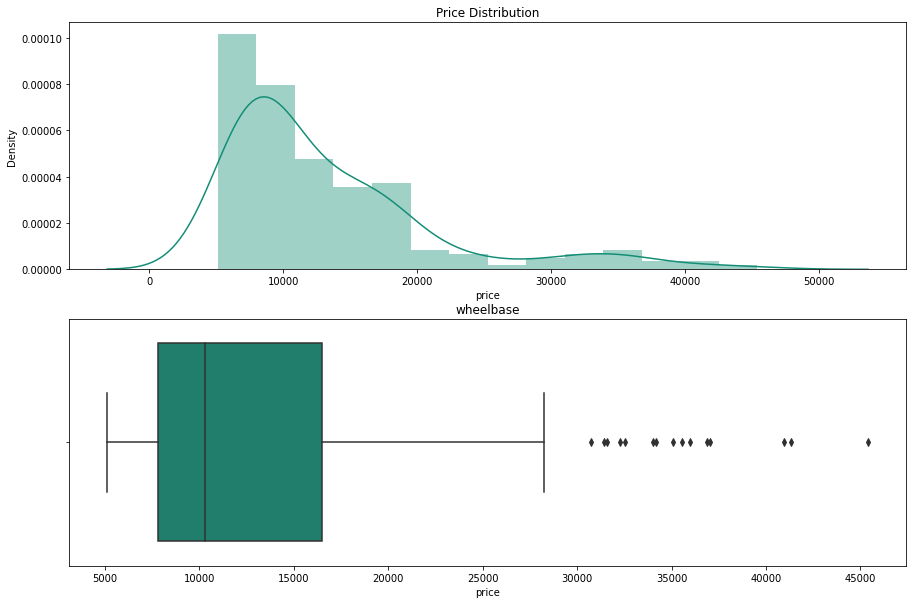

In [131]:
#Our target feature: Price!
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
sns.distplot(df['price'], ax=axs[0], color='#138D75')
axs[0].set_title('Price Distribution')
sns.boxplot(df['price'], ax=axs[1], color='#138D75')
axs[1].set_title('wheelbase')
plt.show()

In [132]:
print('Main statistical values: ')
print('Mean')
print(df.price.mean())
print('-----')
print('Median')
print(df.price.median())
print('-----')
print('Max')
print(df.price.max())
print('-----')
print('Min')
print(df.price.min())
print('-----')
print('Standard deviation')
print(df.price.std())
print('-----')

Main statistical values: 
Mean
13276.710570731706
-----
Median
10295.0
-----
Max
45400.0
-----
Min
5118.0
-----
Standard deviation
7988.85233174315
-----


In [133]:
# Numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])
print(numerical_features.columns)

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'],
      dtype='object')


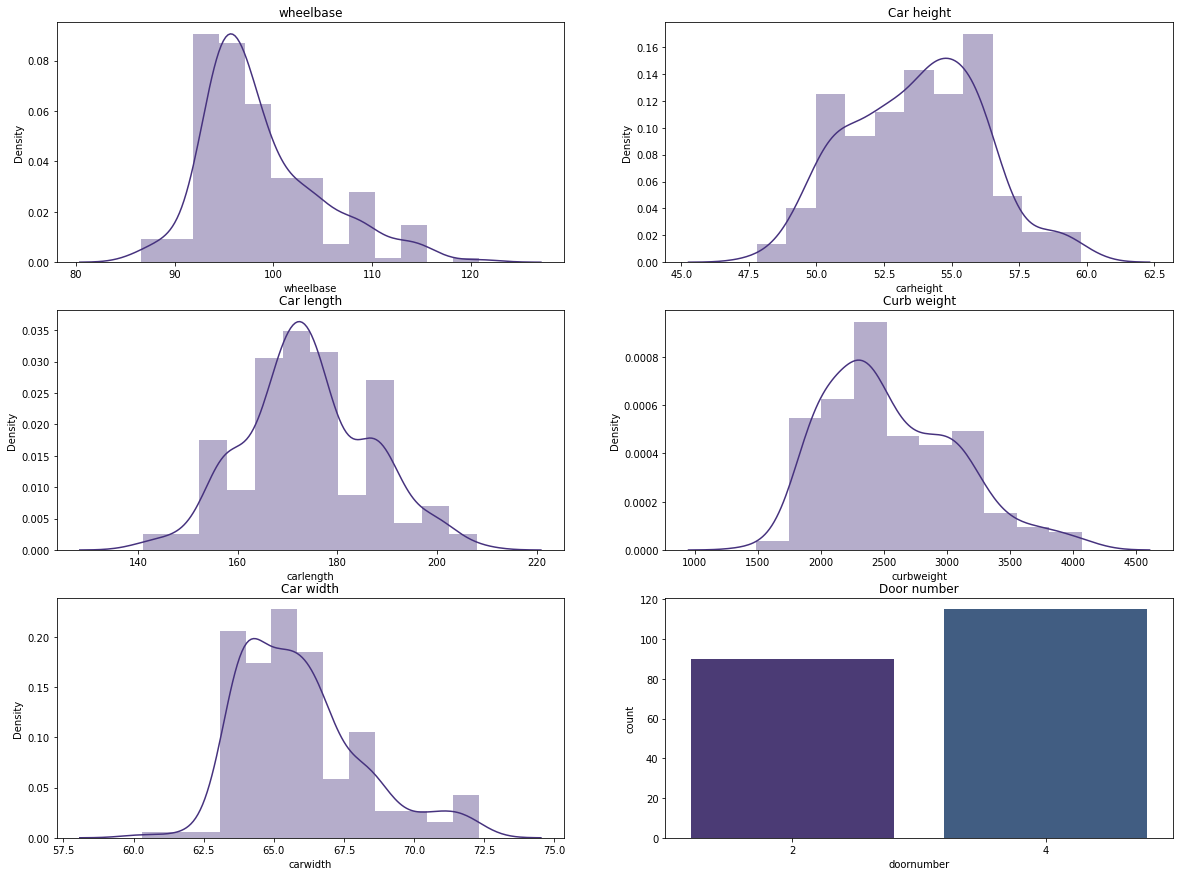

In [134]:
# Distributions
# Car size: 
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
sns.distplot(df['wheelbase'], ax=axs[0, 0])
axs[0, 0].set_title('wheelbase')
sns.distplot(df['carlength'], ax=axs[1, 0])
axs[1, 0].set_title('Car length')
sns.distplot(df['carwidth'], ax=axs[2, 0])
axs[2, 0].set_title('Car width')
sns.distplot(df['carheight'], ax=axs[0, 1])
axs[0, 1].set_title('Car height')
sns.distplot(df['curbweight'], ax=axs[1, 1])
axs[1, 1].set_title('Curb weight')
sns.countplot(df['doornumber'], ax=axs[2, 1])
axs[2, 1].set_title('Door number')
plt.show()

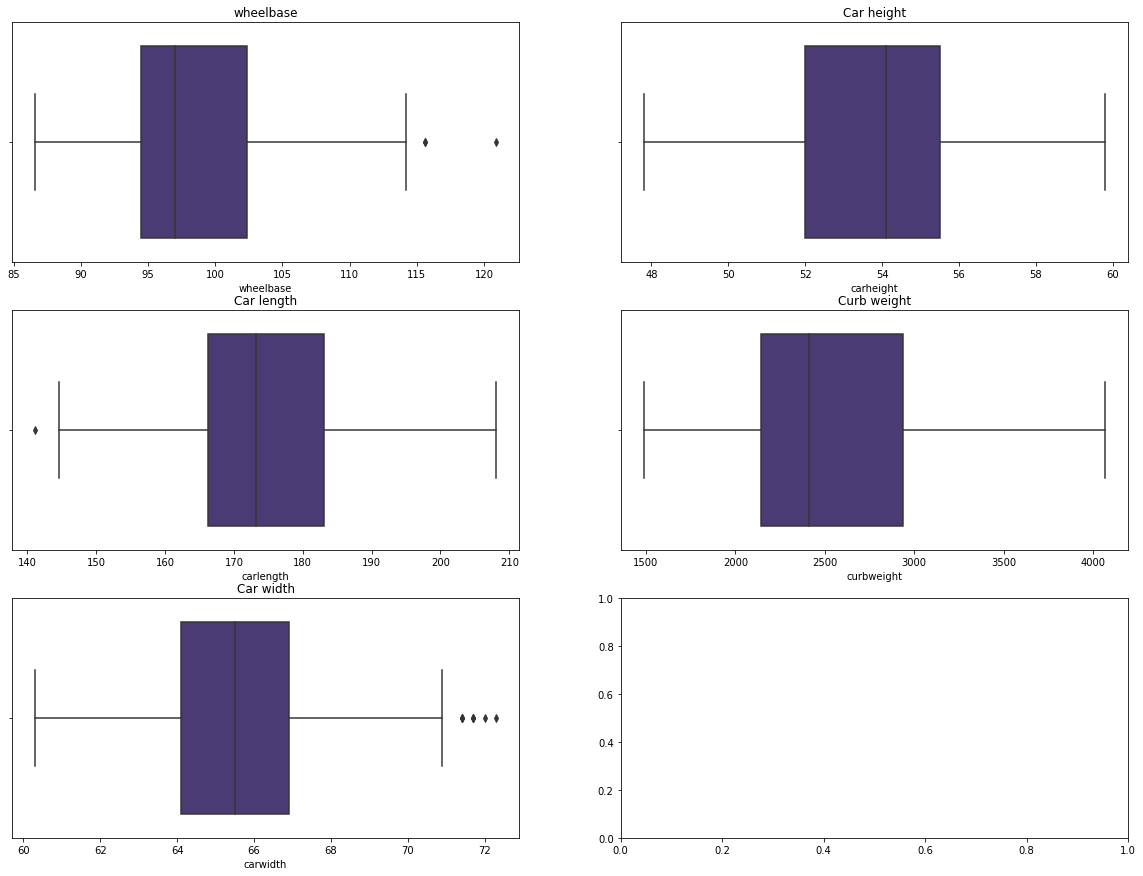

In [135]:
# Boxplot: outliners
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
sns.boxplot(df['wheelbase'], ax=axs[0, 0])
axs[0, 0].set_title('wheelbase')
sns.boxplot(df['carlength'], ax=axs[1, 0])
axs[1, 0].set_title('Car length')
sns.boxplot(df['carwidth'], ax=axs[2, 0])
axs[2, 0].set_title('Car width')
sns.boxplot(df['carheight'], ax=axs[0, 1])
axs[0, 1].set_title('Car height')
sns.boxplot(df['curbweight'], ax=axs[1, 1])
axs[1, 1].set_title('Curb weight')
plt.show()

In [136]:
print('There are very few outliners in these features, we will consider them for the model')

There are very few outliners in these features, we will consider them for the model


Text(0.5, 1.0, 'Horse Power')

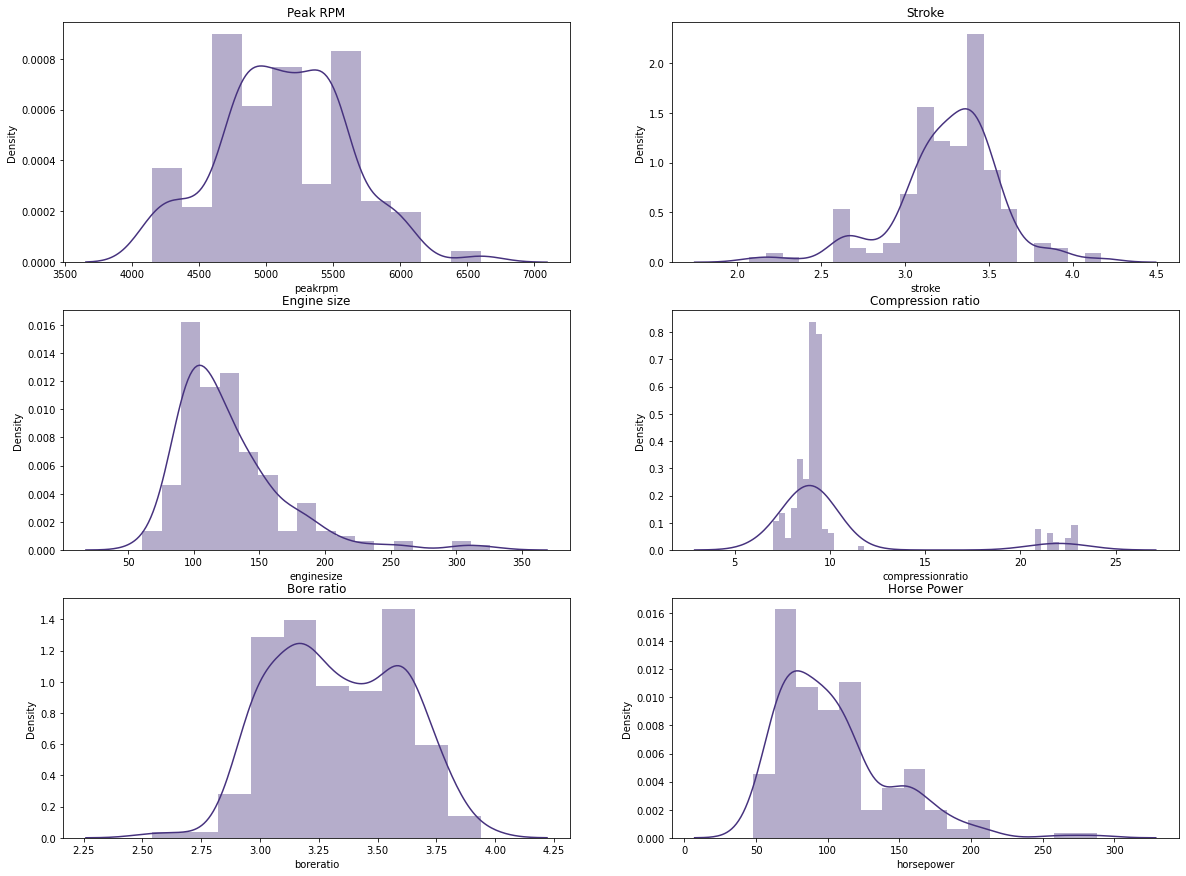

In [137]:
# Distributions
# Engine characteristics: 
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
sns.distplot(df['peakrpm'], ax=axs[0, 0])
axs[0, 0].set_title('Peak RPM')
sns.distplot(df['enginesize'], ax=axs[1, 0])
axs[1, 0].set_title('Engine size')
sns.distplot(df['boreratio'], ax=axs[2, 0])
axs[2, 0].set_title('Bore ratio')
sns.distplot(df['stroke'], ax=axs[0, 1])
axs[0, 1].set_title('Stroke')
sns.distplot(df['compressionratio'], ax=axs[1, 1])
axs[1, 1].set_title('Compression ratio')
sns.distplot(df['horsepower'], ax=axs[2, 1])
axs[2, 1].set_title('Horse Power')

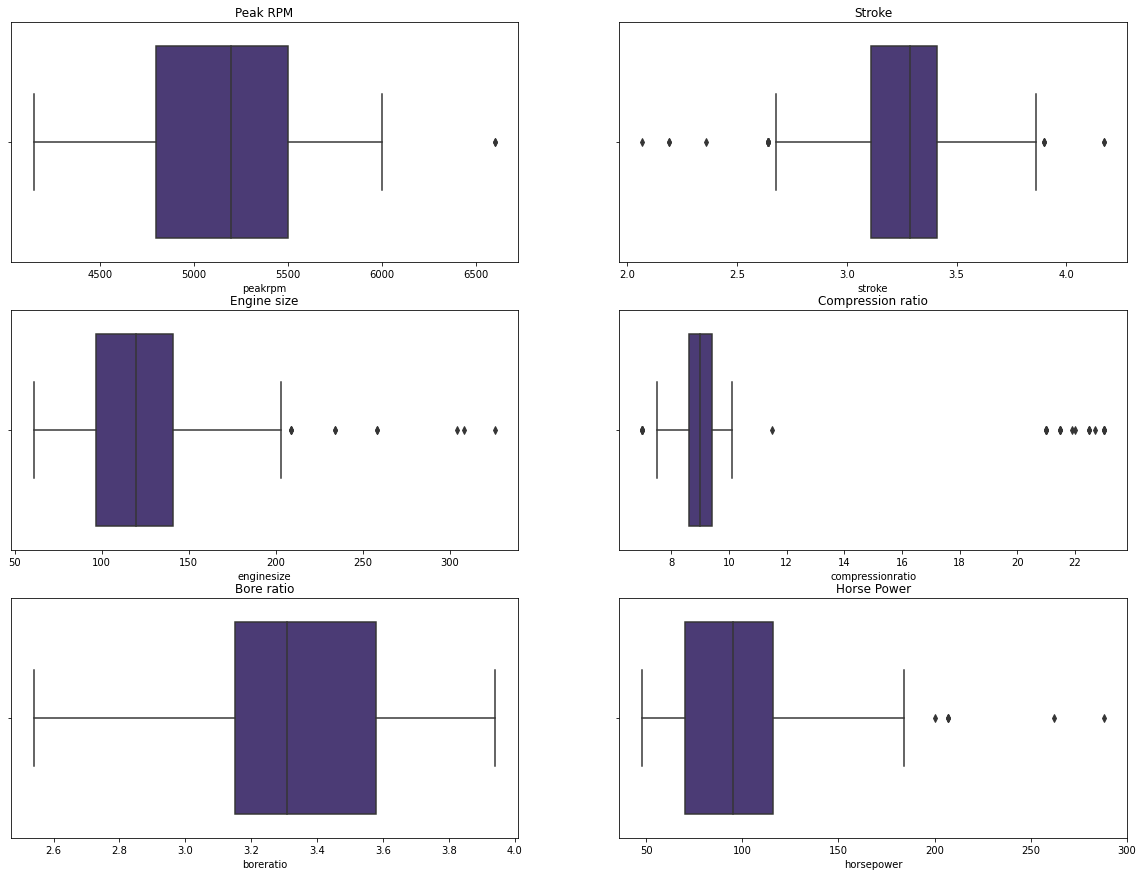

In [138]:
# Boxplot: outliners
# Engine characteristics: 
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
sns.boxplot(df['peakrpm'], ax=axs[0, 0])
axs[0, 0].set_title('Peak RPM')
sns.boxplot(df['enginesize'], ax=axs[1, 0])
axs[1, 0].set_title('Engine size')
sns.boxplot(df['boreratio'], ax=axs[2, 0])
axs[2, 0].set_title('Bore ratio')
sns.boxplot(df['stroke'], ax=axs[0, 1])
axs[0, 1].set_title('Stroke')
sns.boxplot(df['compressionratio'], ax=axs[1, 1])
axs[1, 1].set_title('Compression ratio')
sns.boxplot(df['horsepower'], ax=axs[2, 1])
axs[2, 1].set_title('Horse Power')
plt.show()

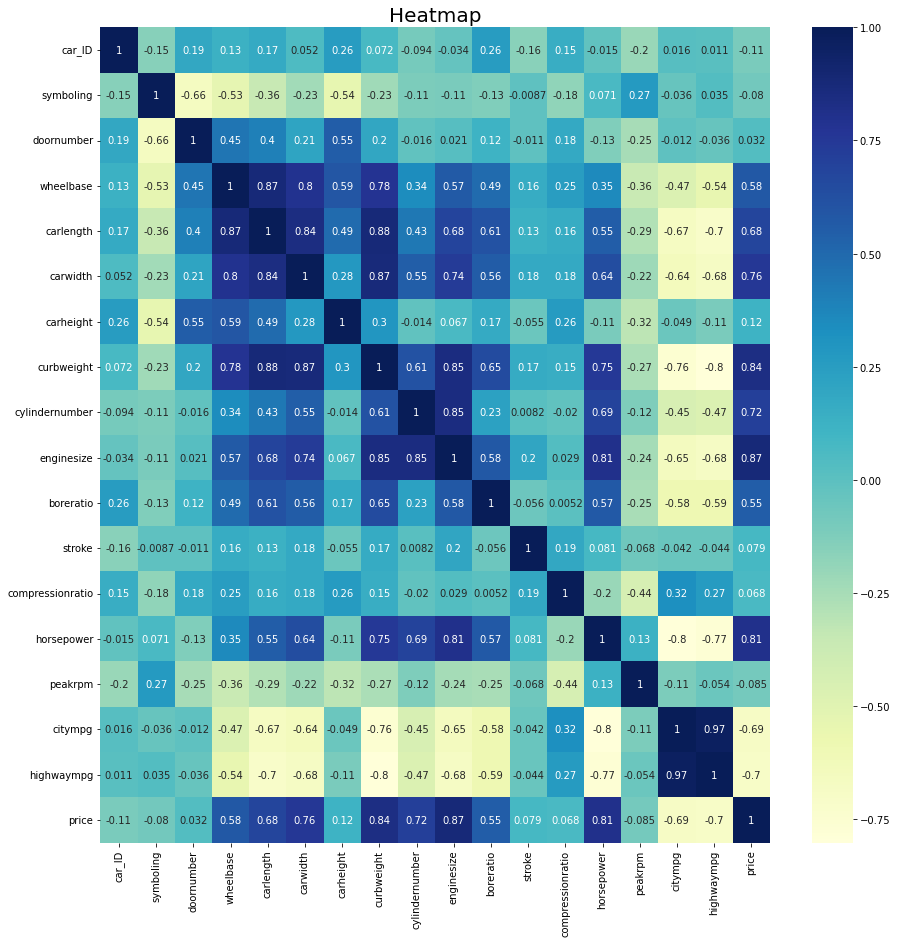

In [139]:
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.title('Heatmap', fontsize = 20)
plt.show()

##### Acording to the heatmap there are certain features heavely related to the price of the vehicle
* Directly proportional
    * wheelbase
    * carlength
    * curbweight
    * cylinder number
    * enginezize
    * horsepower
* Indirectly proportional
    * citympg
    * highwaympg

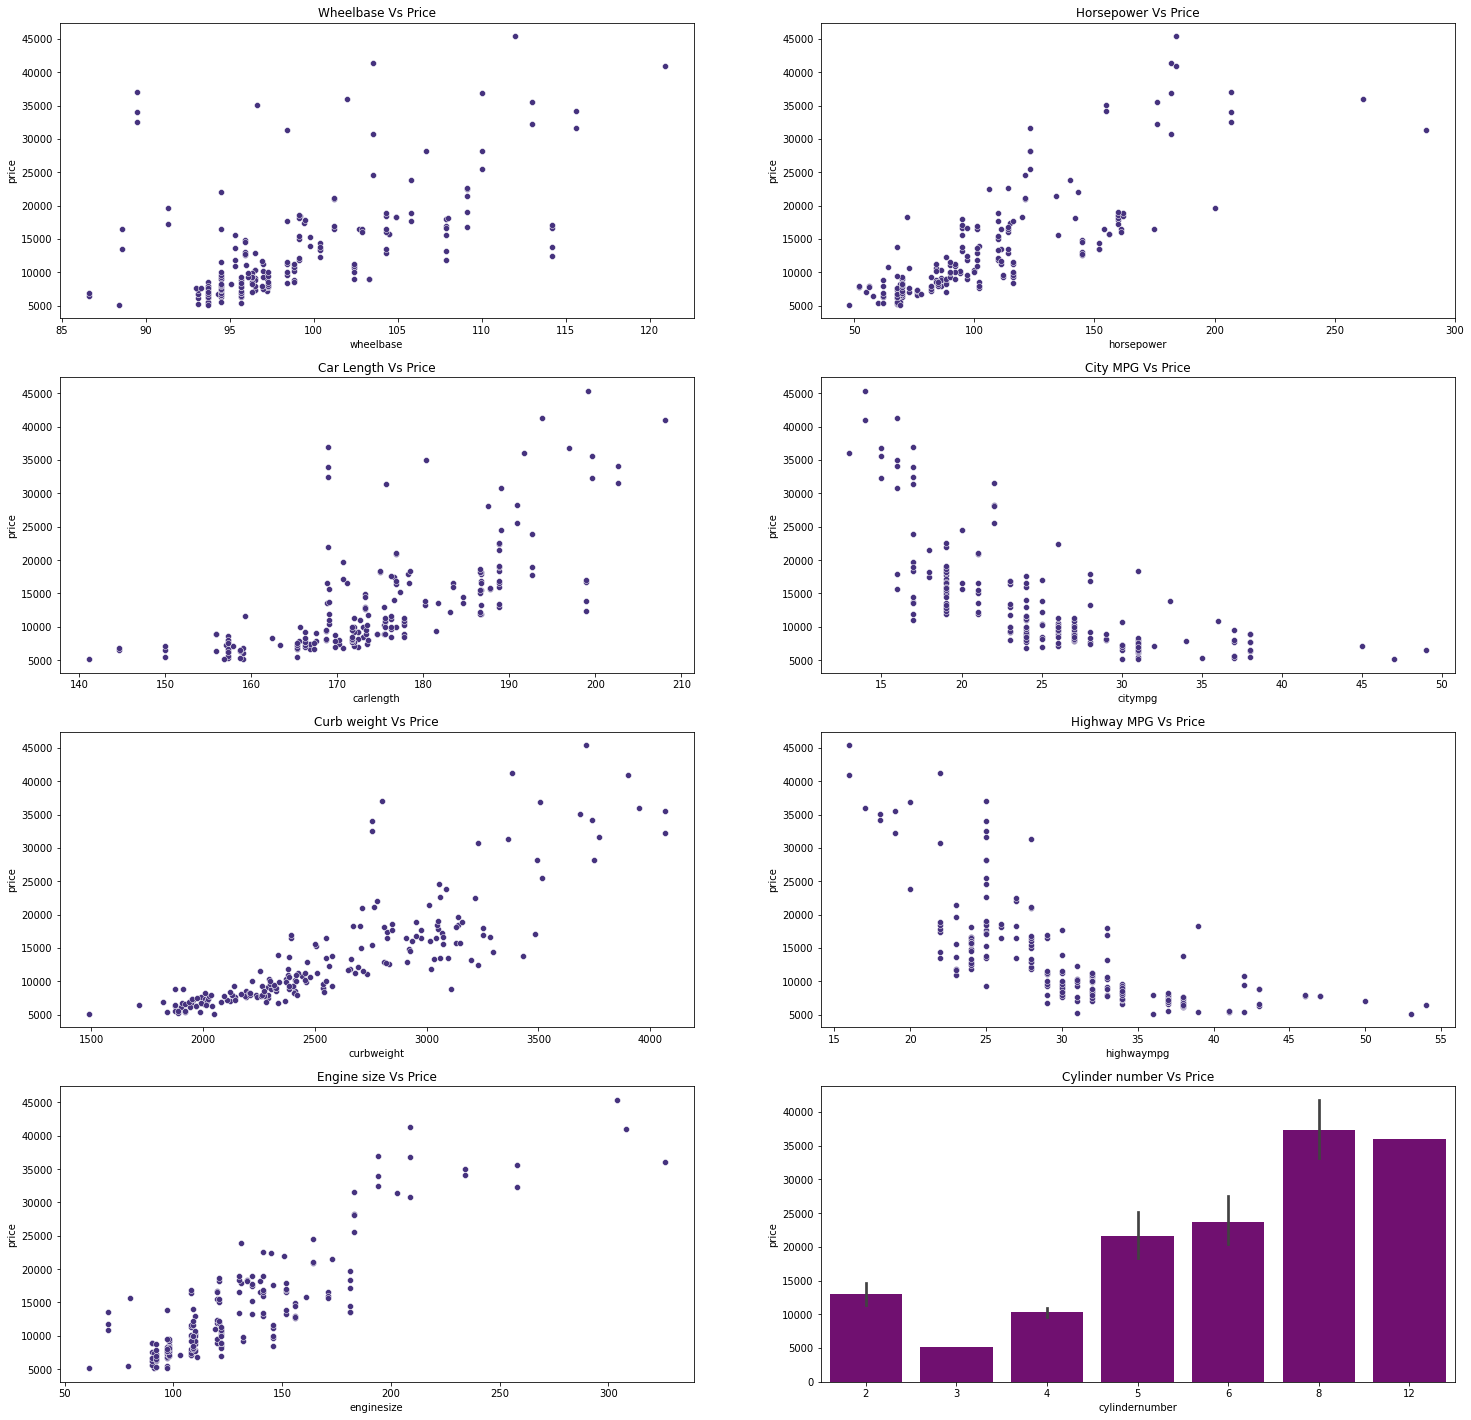

In [140]:
# How linear are these relationships?
fig, axs = plt.subplots(4, 2, figsize=(25, 25))
sns.scatterplot(x= df['wheelbase'], y= df['price'] , ax=axs[0, 0])
axs[0, 0].set_title('Wheelbase Vs Price')
sns.scatterplot(x= df['carlength'], y= df['price'] , ax=axs[1, 0])
axs[1, 0].set_title('Car Length Vs Price')
sns.scatterplot(x= df['curbweight'], y= df['price'] , ax=axs[2, 0])
axs[2, 0].set_title('Curb weight Vs Price')
sns.scatterplot(x= df['enginesize'], y= df['price'] , ax=axs[3, 0])
axs[3, 0].set_title('Engine size Vs Price')
sns.scatterplot(x= df['horsepower'], y= df['price'] , ax=axs[0, 1])
axs[0, 1].set_title('Horsepower Vs Price')
sns.scatterplot(x= df['citympg'], y= df['price'] , ax=axs[1, 1])
axs[1, 1].set_title('City MPG Vs Price')
sns.scatterplot(x= df['highwaympg'], y= df['price'] , ax=axs[2, 1])
axs[2, 1].set_title('Highway MPG Vs Price')
sns.barplot(x= df['cylindernumber'], y= df['price'] , ax=axs[3, 1], color='purple')
axs[3, 1].set_title('Cylinder number Vs Price')
plt.show()

In [141]:
# Categorical Features
categorical_features = df.select_dtypes(include=['object'])
print(categorical_features.columns)

Index(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem', 'brand'],
      dtype='object')


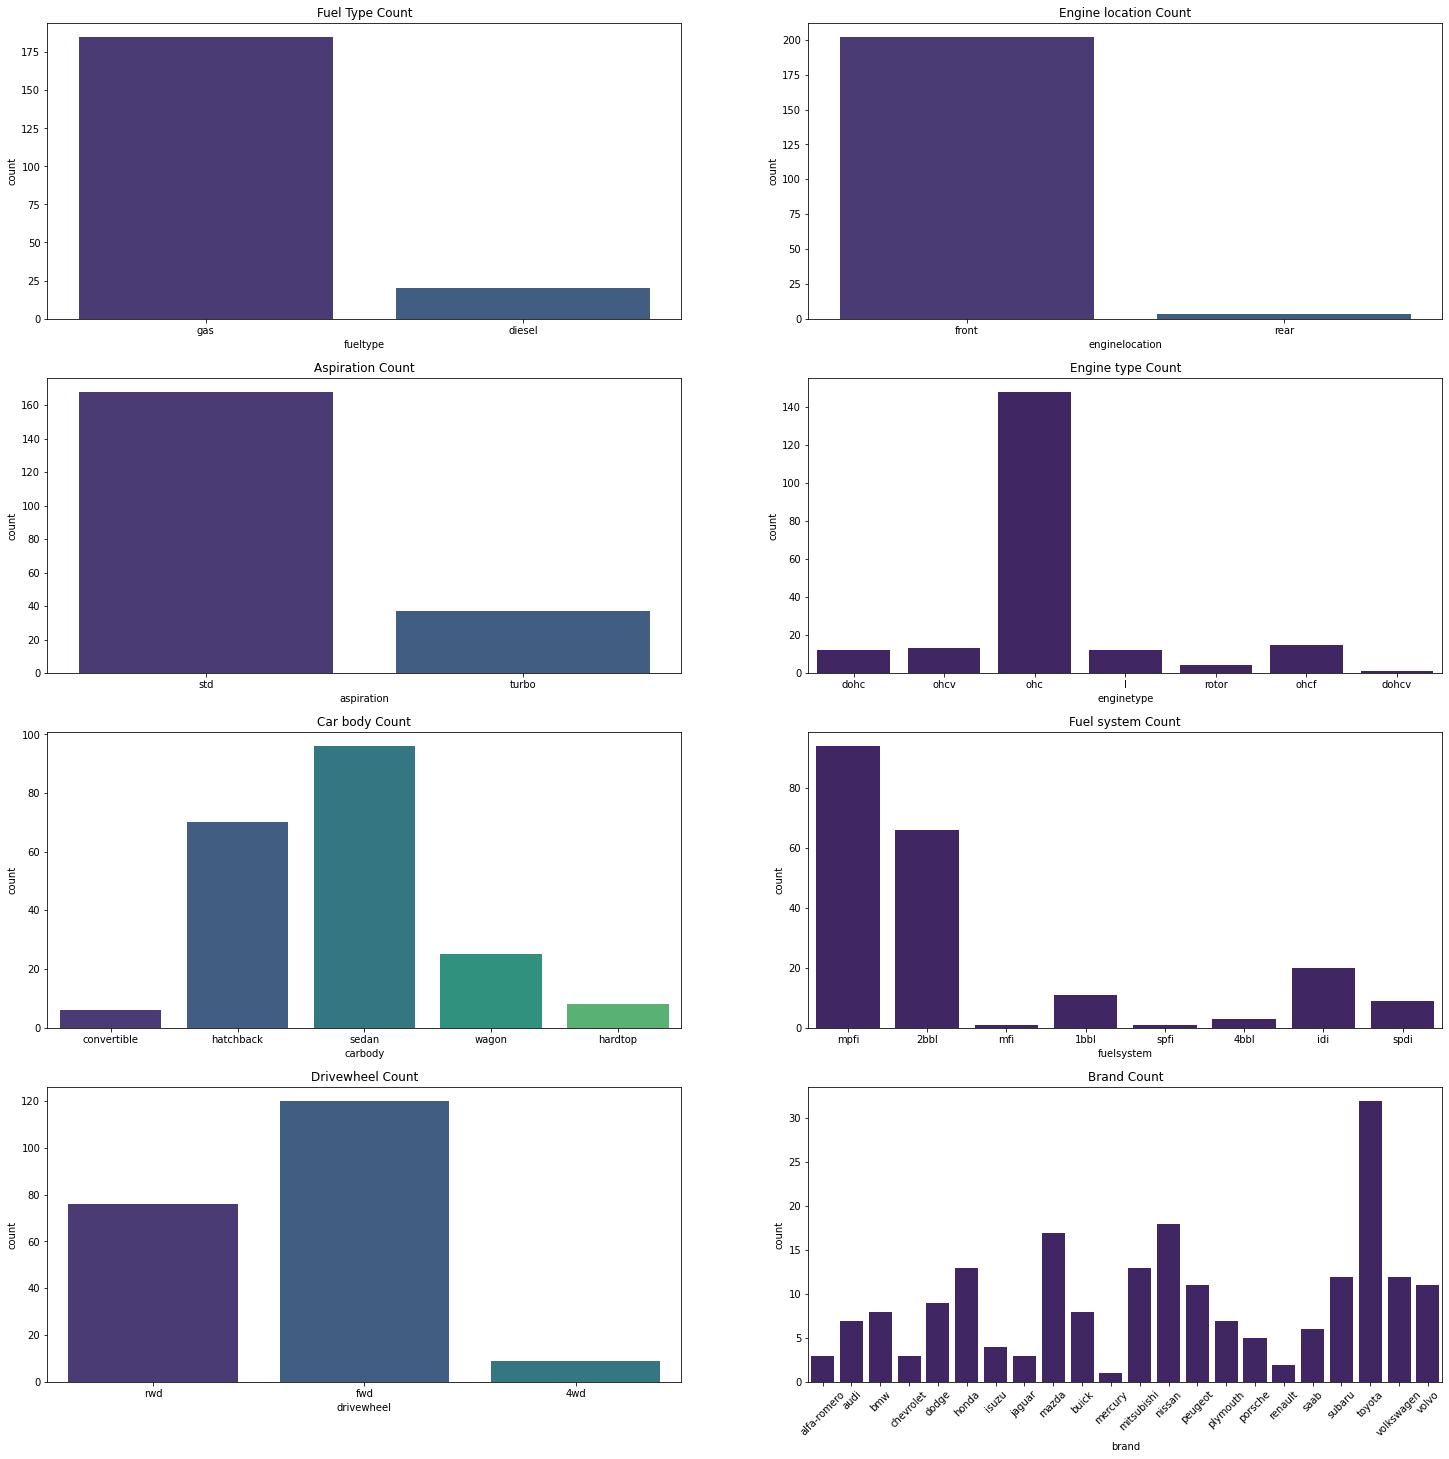

In [142]:
# Count for each feature
fig, axs = plt.subplots(4, 2, figsize=(25, 25))
sns.countplot(df['fueltype'], ax=axs[0, 0])
axs[0, 0].set_title('Fuel Type Count')
sns.countplot(df['aspiration'], ax=axs[1, 0])
axs[1, 0].set_title('Aspiration Count')
sns.countplot(df['carbody'], ax=axs[2, 0])
axs[2, 0].set_title('Car body Count')
sns.countplot(df['drivewheel'], ax=axs[3, 0])
axs[3, 0].set_title('Drivewheel Count')
sns.countplot(df['enginelocation'], ax=axs[0, 1])
axs[0, 1].set_title('Engine location Count')
sns.countplot(df['enginetype'], ax=axs[1, 1], color='#3F1C6D')
axs[1, 1].set_title('Engine type Count')
sns.countplot(df['fuelsystem'], ax=axs[2, 1], color='#3F1C6D')
axs[2, 1].set_title('Fuel system Count')
sns.countplot(df['brand'], ax=axs[3, 1], color='#3F1C6D')
axs[3, 1].set_title('Brand Count')
plt.xticks(rotation = 45)
plt.show()

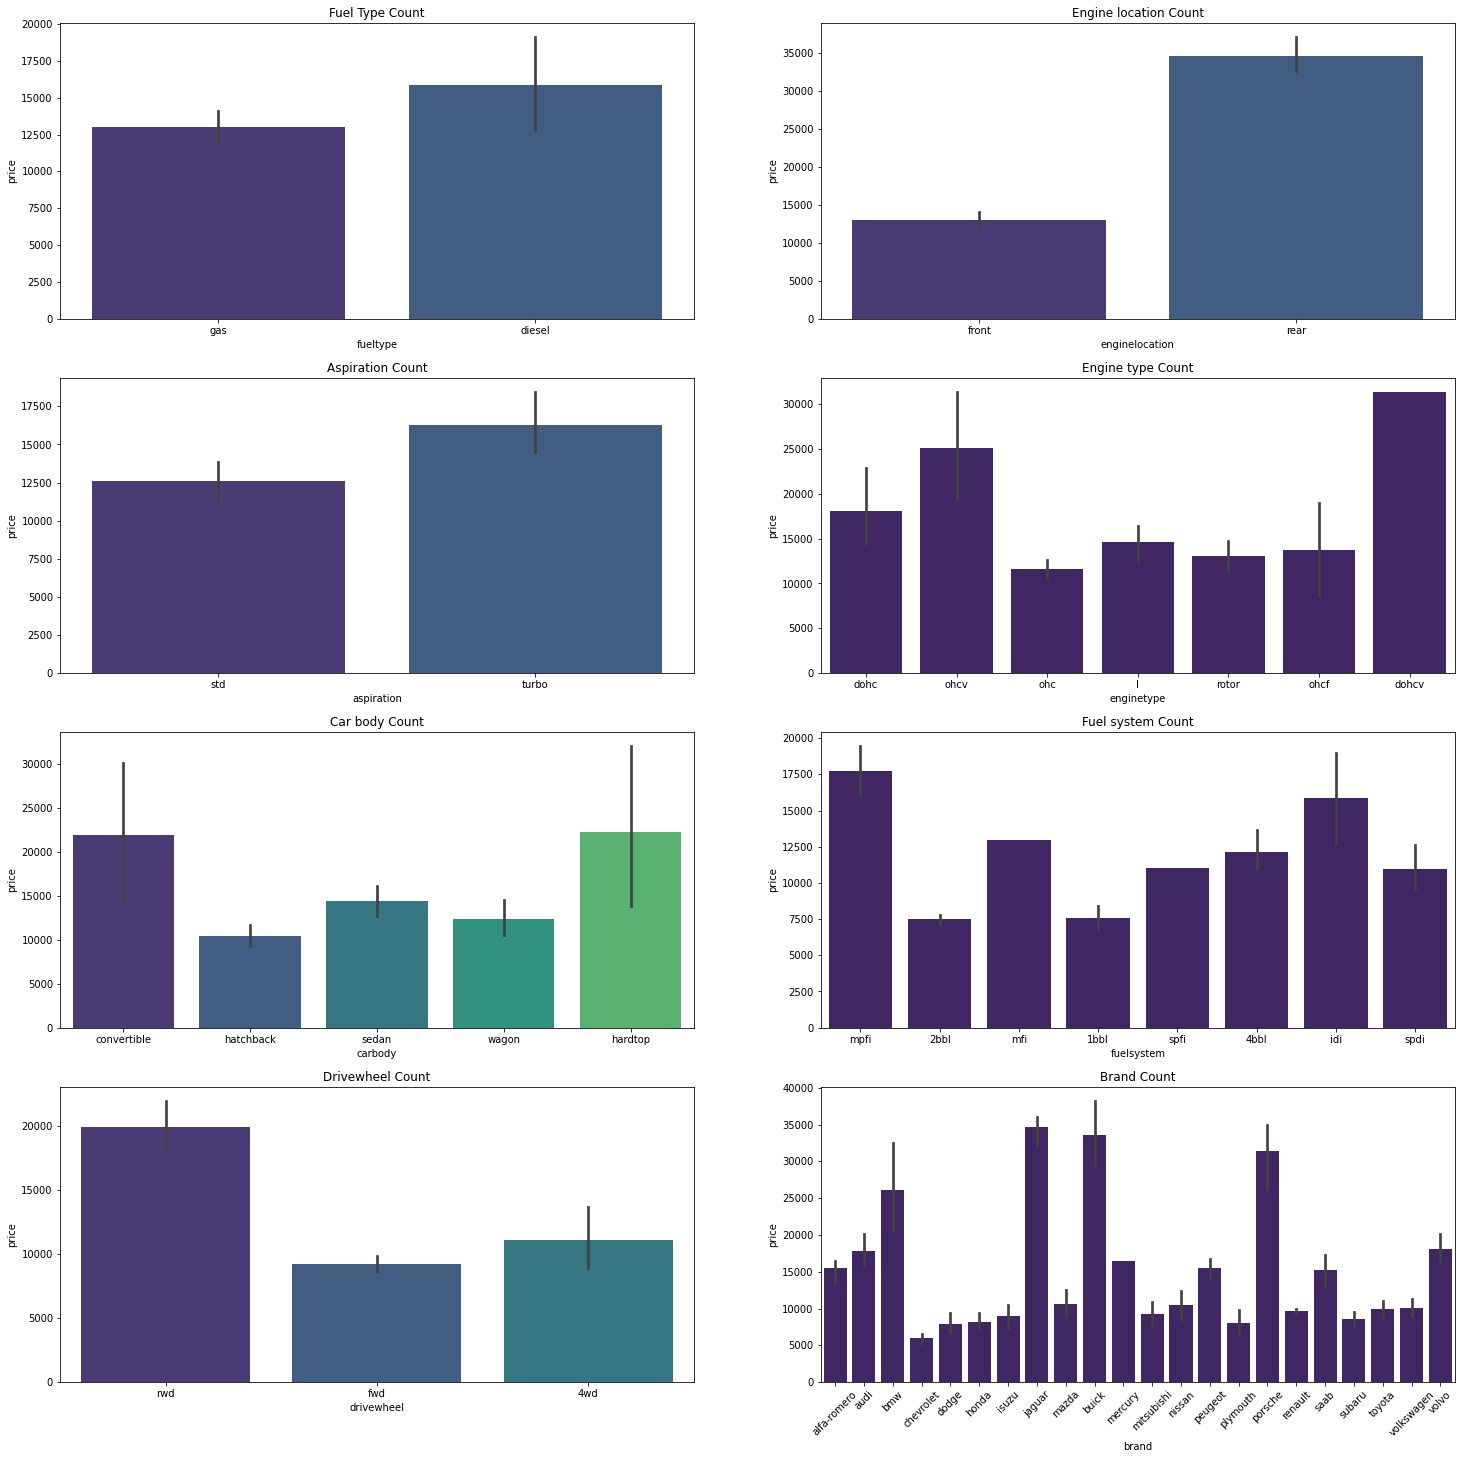

In [143]:
# Relationship between categories and Price
fig, axs = plt.subplots(4, 2, figsize=(25, 25))
sns.barplot(x=df['fueltype'], y=df['price'], ax=axs[0, 0])
axs[0, 0].set_title('Fuel Type Count')
sns.barplot(x=df['aspiration'], y=df['price'], ax=axs[1, 0])
axs[1, 0].set_title('Aspiration Count')
sns.barplot(x=df['carbody'], y=df['price'], ax=axs[2, 0])
axs[2, 0].set_title('Car body Count')
sns.barplot(x=df['drivewheel'], y=df['price'], ax=axs[3, 0])
axs[3, 0].set_title('Drivewheel Count')
sns.barplot(x=df['enginelocation'], y=df['price'], ax=axs[0, 1])
axs[0, 1].set_title('Engine location Count')
sns.barplot(x=df['enginetype'], y=df['price'], ax=axs[1, 1], color='#3F1C6D')
axs[1, 1].set_title('Engine type Count')
sns.barplot(x=df['fuelsystem'], y=df['price'], ax=axs[2, 1], color='#3F1C6D')
axs[2, 1].set_title('Fuel system Count')
sns.barplot(x=df['brand'], y=df['price'], ax=axs[3, 1], color='#3F1C6D')
axs[3, 1].set_title('Brand Count')
plt.xticks(rotation = 45)
plt.show()

##### Based on this analysis we can make a few changes in the data that we are going to use in our model
* Features that can be eliminated
    * enginelocation: nowadays most vehicles have their engine on the front

* Features that can be modified
    * For fuelsystem and enginetype, the categories with little representation can be grouped

In [144]:
# Grouping minority categories
# Fuelsystem
df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [145]:
df['fuelsystem'] = df['fuelsystem'].replace(['mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'], 
                                            ['other', 'other', 'other', 'other', 'other', 'other'])
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'other'], dtype=object)

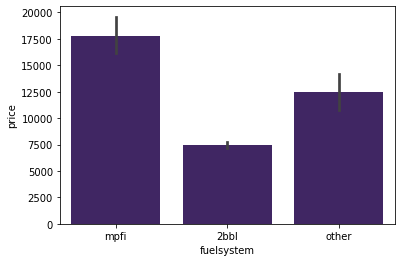

In [146]:
sns.barplot(x=df['fuelsystem'], y=df['price'], color='#3F1C6D')
plt.show()

In [147]:
# Engine type
df['enginetype'].value_counts()


ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

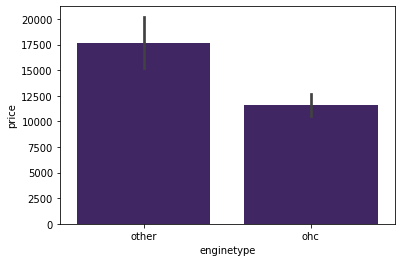

In [148]:
df['enginetype'] = df['enginetype'].replace(['dohc', 'ohcv', 'l', 'rotor', 'ohcf', 'dohcv'], 
                                            ['other', 'other', 'other', 'other', 'other', 'other'])
sns.barplot(x=df['enginetype'], y=df['price'], color='#3F1C6D')
plt.show()

## Features to be used in the model

In [149]:
data = df.drop(['car_ID', 'symboling', 'CarName', 'doornumber', 'carheight', 
        'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'enginelocation'], axis=1)
data.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,citympg,highwaympg,price,brand
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,other,4,130,mpfi,111,21,27,13495.0,alfa-romero
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,other,4,130,mpfi,111,21,27,16500.0,alfa-romero
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,other,6,152,mpfi,154,19,26,16500.0,alfa-romero
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,4,109,mpfi,102,24,30,13950.0,audi
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,5,136,mpfi,115,18,22,17450.0,audi


In [150]:
data.columns

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase',
       'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'horsepower', 'citympg', 'highwaympg',
       'price', 'brand'],
      dtype='object')

In [151]:
datamodel = pd.get_dummies(data, drop_first=True)
datamodel.shape

(205, 42)

In [152]:
datamodel.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_other,fuelsystem_mpfi,fuelsystem_other,brand_audi,brand_bmw,brand_buick,brand_chevrolet,brand_dodge,brand_honda,brand_isuzu,brand_jaguar,brand_mazda,brand_mercury,brand_mitsubishi,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo
0,88.6,168.8,64.1,2548,4,130,111,21,27,13495.0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,2548,4,130,111,21,27,16500.0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,2823,6,152,154,19,26,16500.0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,2337,4,109,102,24,30,13950.0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,2824,5,136,115,18,22,17450.0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Regression Model

In [153]:
X = datamodel.drop(['price'], axis=1)
y = datamodel['price']

In [154]:
# Training and testing: we will take 80% for training and 20% for testing
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### Linear Regression

In [156]:
# Importing the library
from sklearn.linear_model import LinearRegression
ln = LinearRegression(fit_intercept = True, normalize = False)
ln.fit(X_train, y_train)
y_pred = ln.predict(X_test)

In [157]:
# Metrics
print('Mean Squared Error')
print(mean_squared_error(y_test, y_pred))
print('')
print('Root Mean Squared Error')
print(mean_squared_error(y_test, y_pred, squared = False))
print('')
print('Mean Absolute Error')
print(mean_absolute_error(y_test, y_pred))
print('')
print('R2')
print(r2_score(y_test, y_pred))
print('')

Mean Squared Error
9972230.152021129

Root Mean Squared Error
3157.883809138824

Mean Absolute Error
2156.3667080847395

R2
0.8736797284847854



In [180]:
# Intercept
print(ln.intercept_)

-28358.978570794927


In [189]:
# Coeficients
coef = ln.coef_
coef.tolist()
labels = X.columns
coefficients = pd.DataFrame({'variable': labels, 'coefs' : coef})
coefficients


,variable,coefs
0,wheelbase,146.777263
1,carlength,-49.549927
2,carwidth,410.394710
3,curbweight,3.135772
4,cylindernumber,-188.478962
5,enginesize,34.787915
6,horsepower,15.531904
7,citympg,-54.478792
8,highwaympg,15.726093
9,fueltype_gas,-776.479132


### Random Forest Regressor

In [158]:
# Importing the library
from sklearn.ensemble import RandomForestRegressor

In [159]:
rforest = RandomForestRegressor()
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)

In [160]:
# Metrics
print('Mean Squared Error')
print(mean_squared_error(y_test, y_pred))
print('')
print('Root Mean Squared Error')
print(mean_squared_error(y_test, y_pred, squared = False))
print('')
print('Mean Absolute Error')
print(mean_absolute_error(y_test, y_pred))
print('')
print('R2')
print(r2_score(y_test, y_pred))
print('')

Mean Squared Error
3453896.5473625697

Root Mean Squared Error
1858.4661813879127

Mean Absolute Error
1254.7709268292683

R2
0.9562487885861845



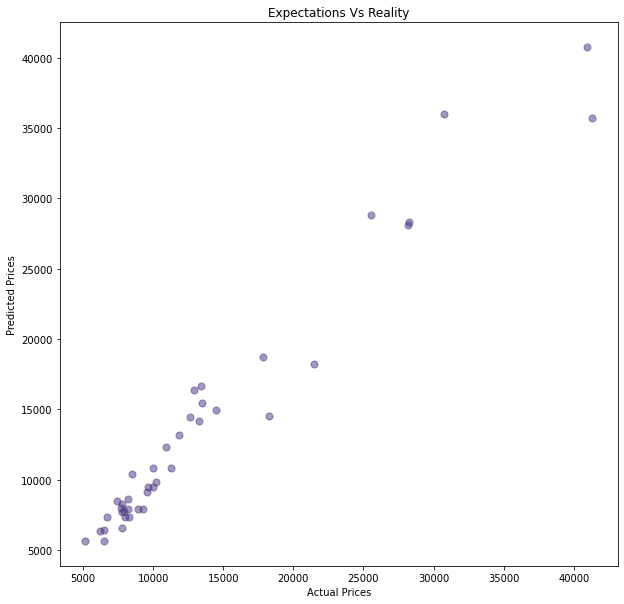

In [161]:
# Let's graph the difference between the real labels and the predicted
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, alpha=0.5, s=50)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Expectations Vs Reality")
plt.show()

In [162]:
#We can see there is a huge improvement of the model, nevertheless, we can try other stuff to get a better model

In [163]:
# Metrics on training
y_pred = rforest.predict(X_train)
print('Mean Squared Error')
print(mean_squared_error(y_train, y_pred))
print('')
print('Root Mean Squared Error')
print(mean_squared_error(y_train, y_pred, squared = False))
print('')
print('Mean Absolute Error')
print(mean_absolute_error(y_train, y_pred))
print('')
print('R2')
print(r2_score(y_train, y_pred))
print('')

Mean Squared Error
821210.6921590492

Root Mean Squared Error
906.2067601596499

Mean Absolute Error
585.3280589430894

R2
0.9862300390464569



In [164]:
# Even though there is and improvement for training, is not so big to ensure we are overfitting

#### Hyperparameters and cross-validation

In [165]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [166]:
pprint(rforest.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [167]:
params_dict = rforest.get_params()


for key, value in params_dict.items():
    print(f'{key: <10}{": "}{value}')

bootstrap : True
ccp_alpha : 0.0
criterion : squared_error
max_depth : None
max_features: auto
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs    : None
oob_score : False
random_state: None
verbose   : 0
warm_start: False


In [168]:
# Hyperparameters to evaluate
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 9)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
max_features.append(None)
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [50, 68, 87, 106, 125, 143, 162, 181, 200], 'max_features': ['auto', 'sqrt', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [176]:
# Model creation
rforest_hp = RandomForestRegressor()
cv = KFold(n_splits=5)
rforest_cv = RandomizedSearchCV(estimator = rforest_hp, param_distributions = random_grid, n_iter = 100, cv = cv,
                                verbose=2, random_state=42, n_jobs = -1)
rforest_cv.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [177]:
# Best params
pprint(rforest_cv.best_params_)

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}


In [178]:
# Predictions
y_pred = rforest_cv.predict(X)

In [179]:
# Metrics
print('Mean Squared Error')
print(mean_squared_error(y, y_pred))
print('')
print('Root Mean Squared Error')
print(mean_squared_error(y, y_pred, squared = False))
print('')
print('Mean Absolute Error')
print(mean_absolute_error(y, y_pred))
print('')
print('R2')
print(r2_score(y, y_pred))
print('')

Mean Squared Error
1682724.6213720252

Root Mean Squared Error
1297.198759393496

Mean Absolute Error
888.1954942254895

R2
0.9735047540265773



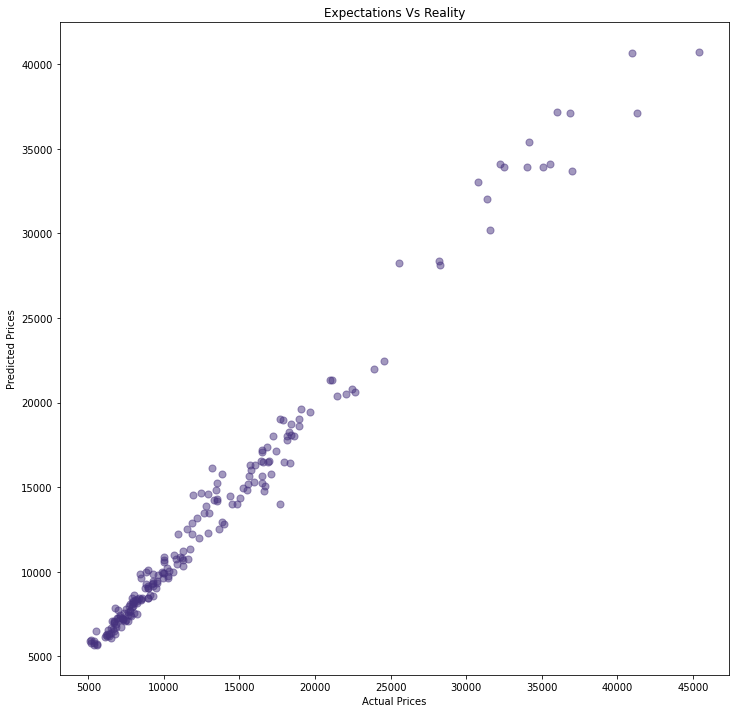

In [174]:
# Let's graph the difference between the real labels and the predicted
plt.figure(figsize=(12, 12))
plt.scatter(y, y_pred, alpha=0.5, s=50)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Expectations Vs Reality")
plt.show()